In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB

In [6]:
df = pd.read_csv('weight-height.csv')

In [9]:
df.Gender = pd.get_dummies(df.Gender)['Male']

In [10]:
df

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801
...,...,...,...
9995,0,66.172652,136.777454
9996,0,67.067155,170.867906
9997,0,63.867992,128.475319
9998,0,69.034243,163.852461


In [161]:
df[df.Gender == 0].describe()

,Gender,Height,Weight
count,5000.0,5000.000000,5000.000000
mean,0.0,63.708774,135.860093
std,0.0,2.696284,19.022468
min,0.0,54.263133,64.700127
25%,0.0,61.894441,122.934096
50%,0.0,63.730924,136.117583
75%,0.0,65.563565,148.810926
max,0.0,73.389586,202.237214


In [12]:
df.isna().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [13]:
df.dtypes

Gender      uint8
Height    float64
Weight    float64
dtype: object

In [15]:
X = df.drop('Gender', axis=1)
y = df.Gender

In [18]:
X.shape[0] == y.shape[0]

True

In [19]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

/Users/mseastar/.brew/Cellar/jupyterlab/3.4.3/libexec/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height', ylabel='Weight'>

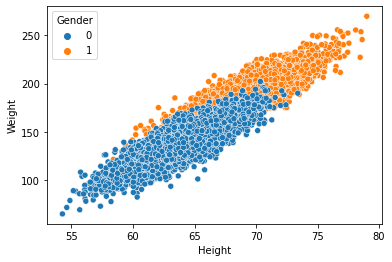

In [21]:
sns.scatterplot(df.Height, df.Weight, data=df, hue='Gender')

In [182]:
from sklearn.neighbors import KNeighborsClassifier

In [183]:
knn = KNeighborsClassifier().fit(X_train, y_train)

In [184]:
knn.score(X_train, y_train)

0.9282666666666667

In [185]:
knn.score(X_test, y_test)

0.912

<AxesSubplot:>

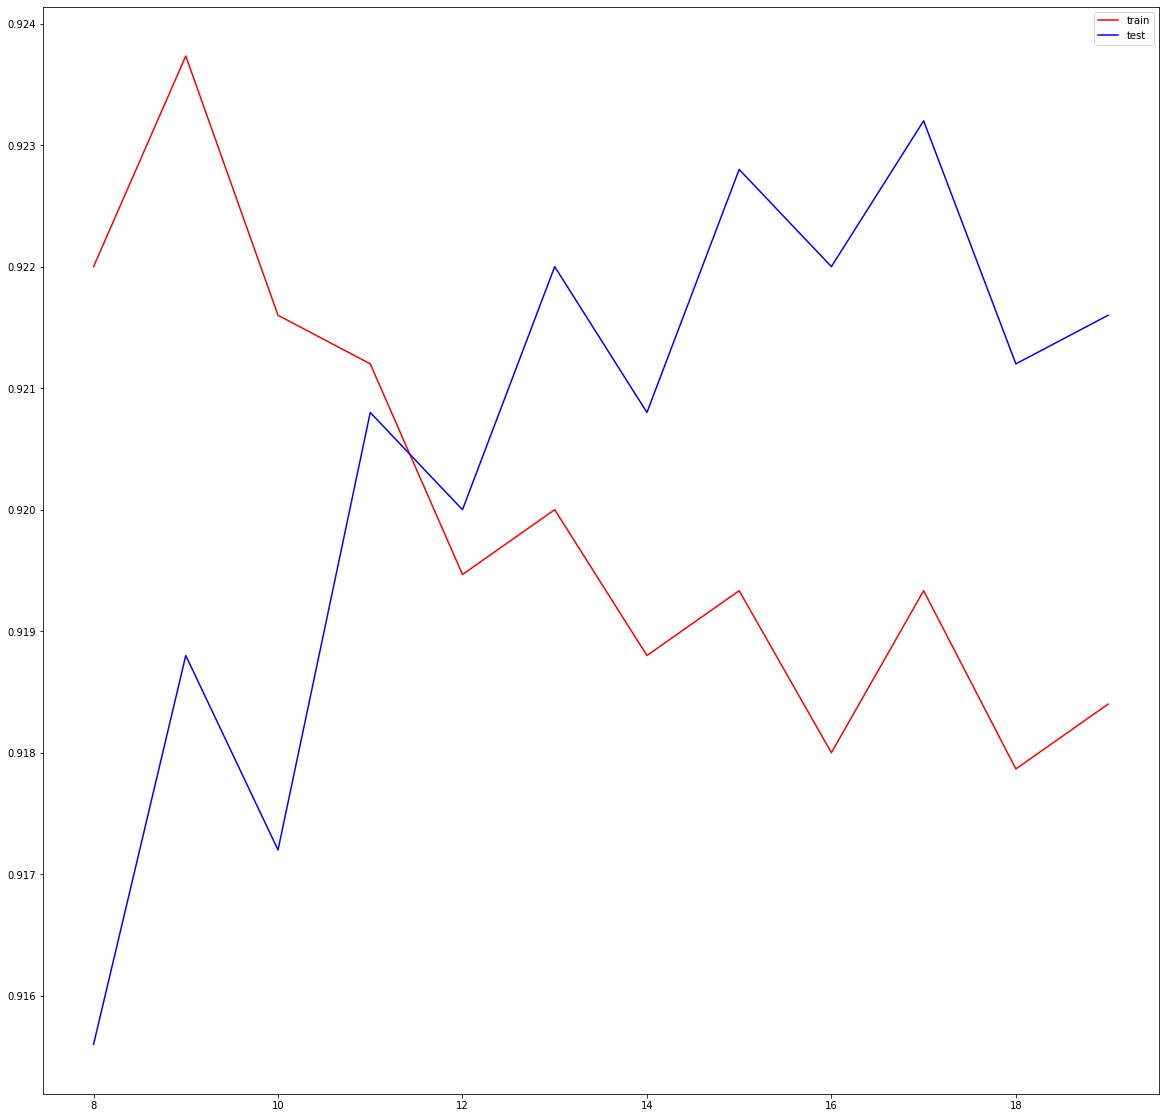

In [50]:
train_score = []
test_score = []
for i in range(8, 20):
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))
plt.figure(figsize=(20, 20))
sns.lineplot(x=range(8,20),y=train_score, color='red', label='train')
sns.lineplot(x=range(8,20),y=test_score, color='blue', label='test')

In [130]:
knn = KNeighborsClassifier(n_neighbors=11).fit(X_train, y_train)

In [131]:
y_pred = knn.predict(X_test)

In [39]:
print(f"""Acc {metrics.accuracy_score(y_test, y_pred)}
R^2 {metrics.r2_score(y_test, y_pred)}
MAE {metrics.mean_absolute_error(y_test, y_pred)}
MSE {metrics.mean_squared_error(y_test, y_pred)}""")

Acc 0.9208
R^2 0.6831018376252227
MAE 9.4264
MSE 0.0792


In [82]:
models = {}
models['knn'] = knn.score(X_test, y_test)

In [83]:
lg = LogisticRegression(penalty='l1', max_iter=1000 ,solver='liblinear').fit(X_train, y_train)
y_pred = lg.predict(X_test)

In [84]:
print(f"""Acc {metrics.accuracy_score(y_test, y_pred)}
R^2 {metrics.r2_score(y_test, y_pred)}
MAE {metrics.mean_absolute_error(y_test, y_pred)}
MSE {metrics.mean_squared_error(y_test, y_pred)}""")

Acc 0.9228
R^2 0.6911043164730707
MAE 9.018
MSE 0.0772


In [85]:
models['LinearReg'] = lg.score(X_test, y_test)

In [87]:
svm = LinearSVC(max_iter=10000).fit(X_train, y_train)
y_pred = svm.predict(X_test)

/Users/mseastar/.brew/Cellar/jupyterlab/3.4.3/libexec/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [88]:
print(f"""Acc {metrics.accuracy_score(y_test, y_pred)}
R^2 {metrics.r2_score(y_test, y_pred)}
MAE {metrics.mean_absolute_error(y_test, y_pred)}
MSE {metrics.mean_squared_error(y_test, y_pred)}""")

Acc 0.9164
R^2 0.6654963841599574
MAE 7.602
MSE 0.0836


In [89]:
models['LinearSVC'] = svm.score(X_test, y_test)

In [90]:
gaus = GaussianNB().fit(X_train, y_train)
y_pred = gaus.predict(X_test)

In [91]:
print(f"""Acc {metrics.accuracy_score(y_test, y_pred)}
R^2 {metrics.r2_score(y_test, y_pred)}
MAE {metrics.mean_absolute_error(y_test, y_pred)}
MSE {metrics.mean_squared_error(y_test, y_pred)}""")

Acc 0.89
R^2 0.5598636633683649
MAE 13.4196
MSE 0.11


In [93]:
models['GausianNB'] = metrics.accuracy_score(y_test, y_pred)

In [95]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=).fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [96]:
print(f"""Acc {metrics.accuracy_score(y_test, y_pred)}
R^2 {metrics.r2_score(y_test, y_pred)}
MAE {metrics.mean_absolute_error(y_test, y_pred)}
MSE {metrics.mean_squared_error(y_test, y_pred)}""")

Acc 0.8824
R^2 0.5294542437465428
MAE 14.24
MSE 0.1176


<AxesSubplot:>

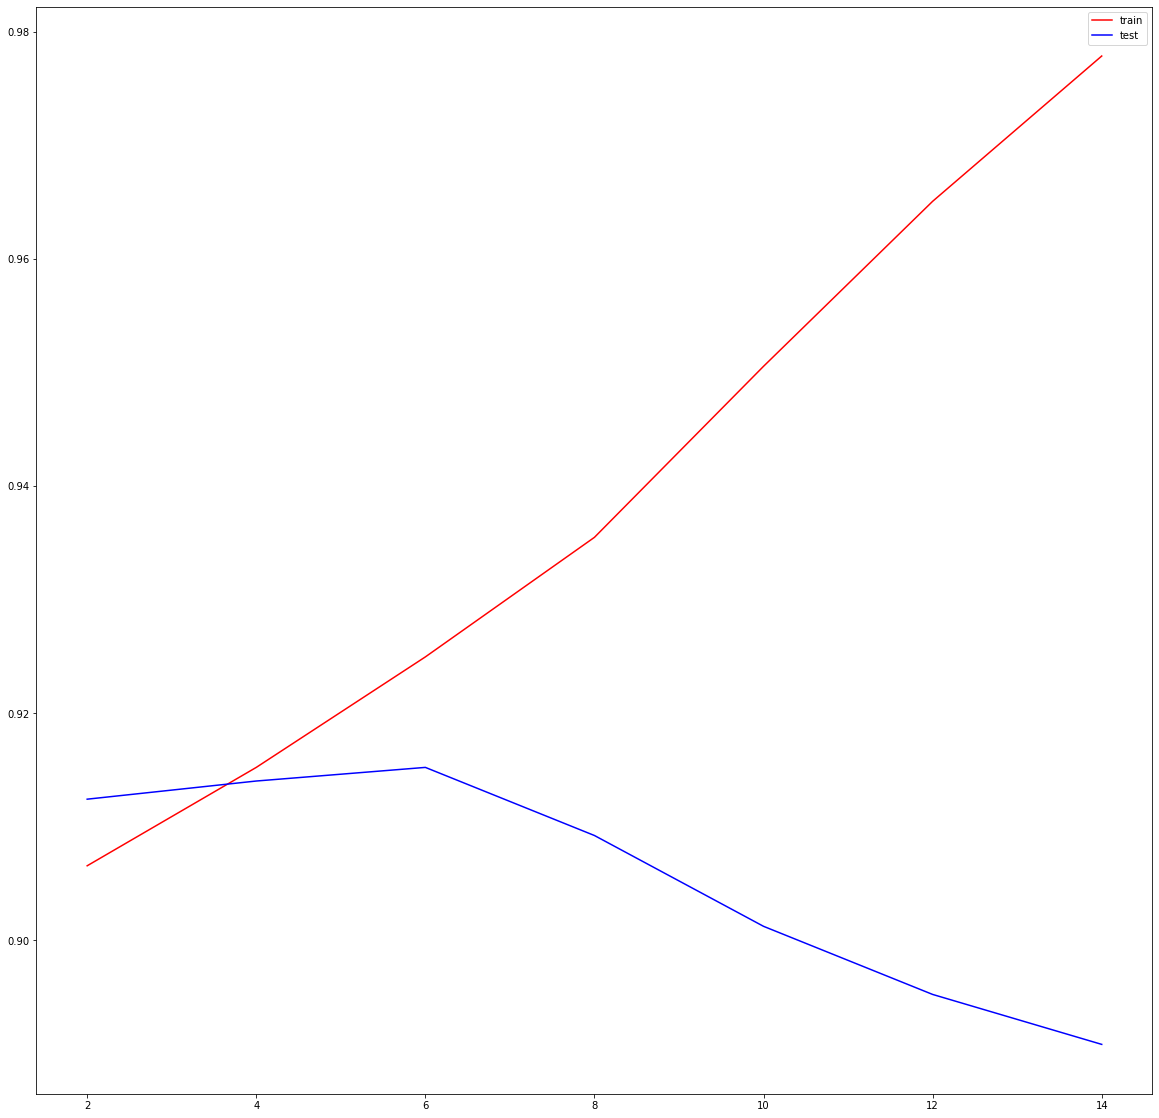

In [105]:
train_score = []
test_score = []
for i in range(2, 15, 2):
    tree = DecisionTreeClassifier(max_depth=i).fit(X_train, y_train)
    train_score.append(tree.score(X_train, y_train))
    test_score.append(tree.score(X_test, y_test))
plt.figure(figsize=(20, 20))
sns.lineplot(x=range(2, 15,2),y=train_score, color='red', label='train')
sns.lineplot(x=range(2, 15,2),y=test_score, color='blue', label='test')

In [106]:
tree = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [107]:
print(f"""Acc {metrics.accuracy_score(y_test, y_pred)}
R^2 {metrics.r2_score(y_test, y_pred)}
MAE {metrics.mean_absolute_error(y_test, y_pred)}
MSE {metrics.mean_squared_error(y_test, y_pred)}""")

Acc 0.914
R^2 0.6558934095425399
MAE 13.1924
MSE 0.086


In [108]:
models['DecisionTree'] = metrics.accuracy_score(y_test, y_pred)

In [109]:
from sklearn.ensemble import RandomForestClassifier

<AxesSubplot:>

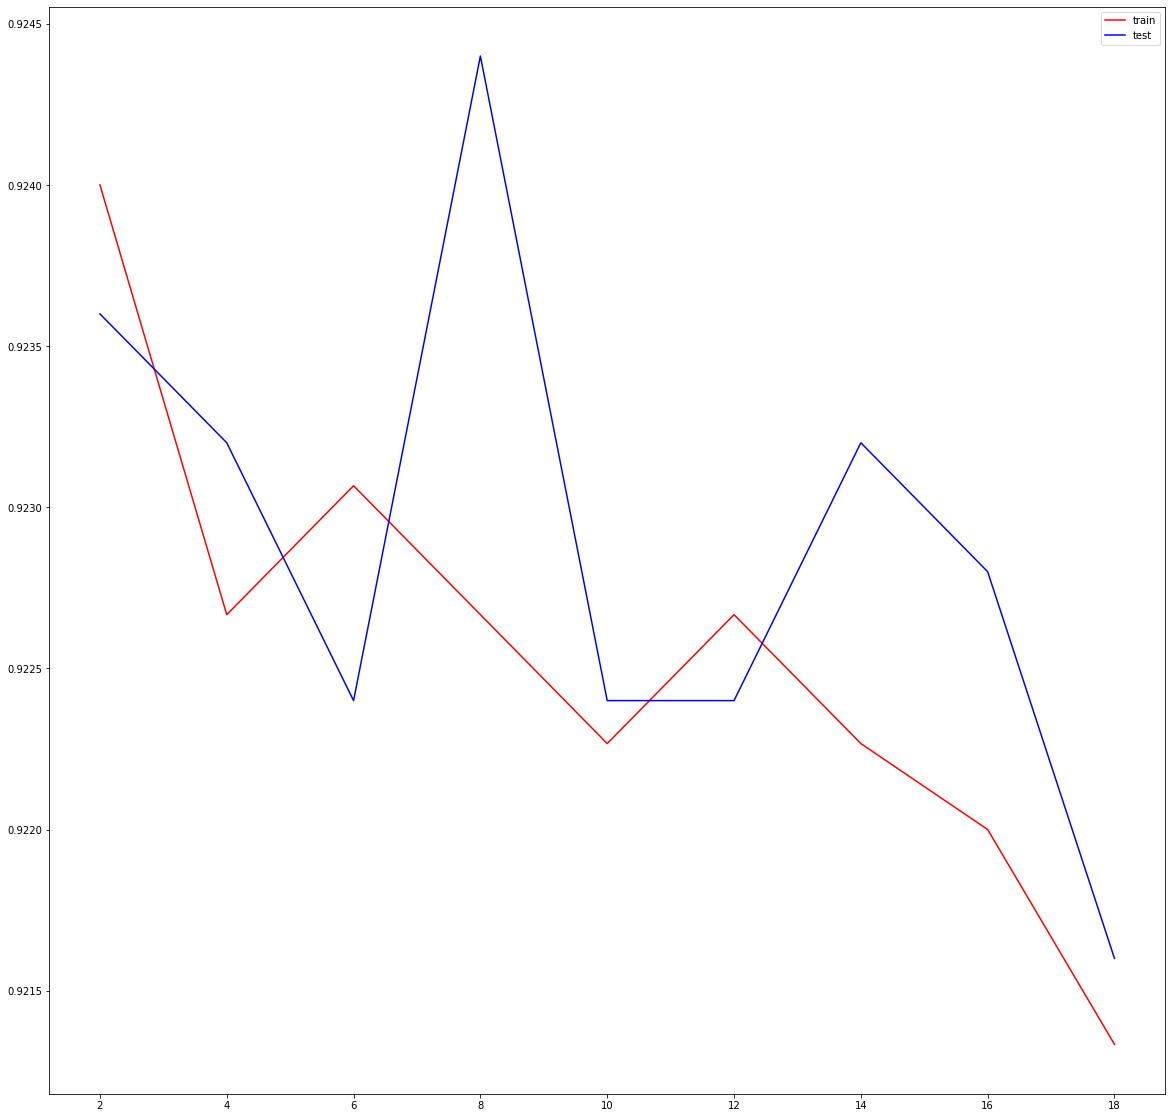

In [118]:
train_score = []
test_score = []
for i in range(2, 20, 2):
    tree = RandomForestClassifier(max_depth=6, min_samples_split=13, min_samples_leaf=3).fit(X_train, y_train)    
    train_score.append(tree.score(X_train, y_train))
    test_score.append(tree.score(X_test, y_test))
plt.figure(figsize=(20, 20))
sns.lineplot(x=range(2, 20,2),y=train_score, color='red', label='train')
sns.lineplot(x=range(2, 20,2),y=test_score, color='blue', label='test')

In [120]:
tree = RandomForestClassifier(max_depth=6, min_samples_split=13, min_samples_leaf=3).fit(X_train, y_train)    
y_pred = tree.predict(X_test)

In [121]:
print(f"""Acc {metrics.accuracy_score(y_test, y_pred)}
R^2 {metrics.r2_score(y_test, y_pred)}
MAE {metrics.mean_absolute_error(y_test, y_pred)}
MSE {metrics.mean_squared_error(y_test, y_pred)}""")

Acc 0.9216
R^2 0.6863028291643619
MAE 9.4256
MSE 0.0784


In [122]:
models['RandomForest'] = metrics.accuracy_score(y_test, y_pred)

In [127]:
scores_df = pd.DataFrame([i for i in models.items()], columns=['model', 'score accuracy'])

In [129]:
scores_df.sort_values('score accuracy',ascending=False)

,model,score accuracy
1,LinearReg,0.9228
0,knn,0.9216
5,RandomForest,0.9216
2,LinearSVC,0.9164
4,DecisionTree,0.9140
3,GausianNB,0.8900


In [132]:
df

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801
...,...,...,...
9995,0,66.172652,136.777454
9996,0,67.067155,170.867906
9997,0,63.867992,128.475319
9998,0,69.034243,163.852461


In [135]:
pd.DataFrame([['Height', 76], ['Weight', 196]])

,0,1
0,Height,76
1,Weight,196


In [223]:
one = {'Height': [75], 
       'Weight': [192]}

In [224]:
me = pd.DataFrame(one)

In [225]:
knn.predict_proba(me)

array([[0.2, 0.8]])

In [226]:
knn.predict(me)

array([1], dtype=uint8)

/Users/mseastar/.brew/Cellar/jupyterlab/3.4.3/libexec/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height', ylabel='Weight'>

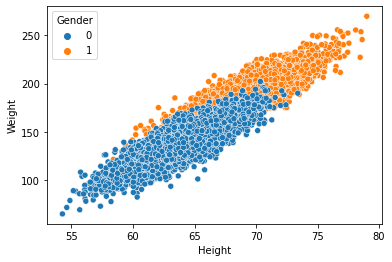

In [194]:
sns.scatterplot(df.Height, df.Weight, data=df, hue='Gender')

/var/folders/zz/zyxvpxvq6csfxvn_n003vq4000yxs0/T/ipykernel_57804/2085451254.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.tril(np.ones_like(df.corr(), dtype=np.bool))


<AxesSubplot:>

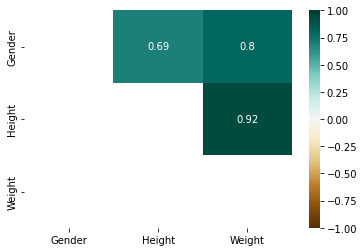

In [238]:
mask = np.tril(np.ones_like(df.corr(), dtype=np.bool)) 
sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG') 

In [230]:
np.ones_like(df.corr(), dtype=np.bool)

/var/folders/zz/zyxvpxvq6csfxvn_n003vq4000yxs0/T/ipykernel_57804/2642247975.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.ones_like(df.corr(), dtype=np.bool)


array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [237]:
np.tril(np.ones_like(df.corr(), dtype=np.bool)) 

/var/folders/zz/zyxvpxvq6csfxvn_n003vq4000yxs0/T/ipykernel_57804/1907954303.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.tril(np.ones_like(df.corr(), dtype=np.bool))


array([[ True, False, False],
       [ True,  True, False],
       [ True,  True,  True]])

In [239]:
np.tril(df.corr())

array([[1.        , 0.        , 0.        ],
       [0.69107204, 1.        , 0.        ],
       [0.79672335, 0.9247563 , 1.        ]])